In [1]:
import numpy as np
import pandas as pd
import numpy.random as rng
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iso.csv')

# Predict Mass Fractions

In [3]:
r = np.load('tmp/mass_fractions_preds.npz', allow_pickle=True)
list_train_ix = r['list_train_ix']
list_yhat = r['list_yhat']
cfg = r['cfg'].tolist()
Y = np.array(df[cfg['output_cols']])

In [4]:
mean_maes = []
stderr_maes = []
n_models = len(cfg['models'])
for m in range(n_models):
    model_preds = list_yhat[:,m,:,:]
    
    ae = np.abs(model_preds - Y)
    test_ae = []
    for rep in range(ae.shape[0]):
        test_ae.append(ae[rep, ~list_train_ix[rep,:], :])
    test_ae = np.array(test_ae)

    mae = np.mean(test_ae, axis=1)
    
    mean_mae = np.mean(mae, axis=0)
    stderr_mae = np.std(mae, axis=0, ddof=1)
        
    mean_maes.append(mean_mae)
    stderr_maes.append(stderr_mae)

In [5]:
output_cols = cfg['output_cols']
labels = [l.replace('process_','') for l in output_cols]
model_names = [m['name'] for m in cfg['models']]
means_df = pd.DataFrame(data=np.array(mean_maes).T, columns=model_names, index=labels)
err_df = pd.DataFrame(data=np.array(stderr_maes).T, columns=model_names, index=labels)

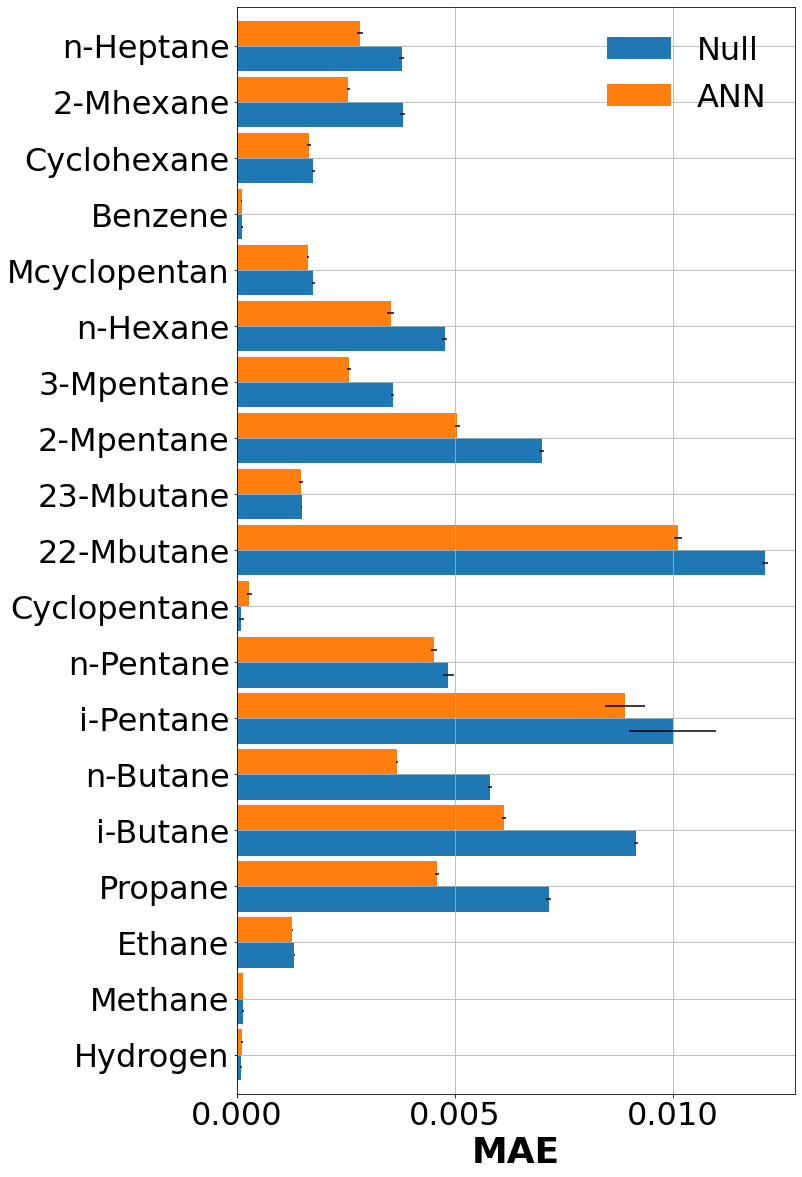

In [6]:
f, ax = plt.subplots(1, 1, figsize=(10, 20))
means_df.plot.barh(xerr=err_df, ax=ax, width=0.90)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_ylabel('')
ax.set_xlabel('MAE', fontsize=36, fontweight='bold')
ax.grid(True)
ax.legend(fontsize=32, frameon=False)